   label   area  equivalent_diameter  mean_intensity  solidity
0      1    667            29.141908       85.133433  0.523548
1      2   1607            45.233792       62.439328  0.587569
2      3     22             5.292567      103.227273  0.666667
3      4  59385           274.975145       72.603368  0.436966
4      5      2             1.595769      138.000000  1.000000


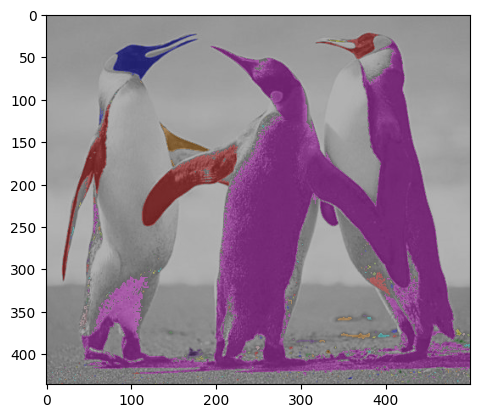

In [2]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

# The input image.
image = img_as_ubyte(rgb2gray(io.imread("/content/trial.jpg")))


from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)

#Label connected regions of an integer array using measure.label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor.
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2

label_image = measure.label(image < threshold, connectivity=image.ndim)
#plt.imshow(label_image)
#Return an RGB image where color-coded labels are painted over the image.
#Using label2rgb

image_label_overlay = label2rgb(label_image, image=image)
plt.imshow(image_label_overlay)

plt.imsave("labeled_cast_iron.jpg", image_label_overlay)

#Compute image properties and return them as a pandas-compatible table.
#Available regionprops: area, bbox, centroid, convex_area, coords, eccentricity,
# equivalent diameter, euler number, label, intensity image, major axis length,
#max intensity, mean intensity, moments, orientation, perimeter, solidity, and many more

props = measure.regionprops_table(label_image, image,
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())
